# Example script

### This code is built to illustrate a typical execution of the 'main.py' script. The only difference is that we have included step-by-step explanation with intermediate plots to ease the understanding.

-------------------------------------------

### Load libraries and image parameters

In [1]:
from PIL import Image
import PIL.ImageOps
import os

import matplotlib.pyplot as plt
from libs import utils

### Image parameters

# Dots per inch (DPI) of raw image (resolution used to scan the droplet 
# patterns).
dpi = 3200

# Desired width and height of final image in centimeters (side length of 
# scanned squared area in the experiments).
length = 5.0

# Binary threshold used to binarize the images. 0.3 gives the most accurate 
# results with our materials, but any other value can be used. 
binary_threshold = 0.3

# By default, the crop_raw function defined in libs/utils.py crops the center 
# of the raw image, discarding the same amount of pixels on its left and right 
# sides, as well as on its top and bottom sides. 
# Sometimes, however, the cropped image contains details that are not desired. 
# For example, the reference marks printed on our experiment paper sheets.
# These two parameters allow us to shift the region that will be cropped. They 
# represent the number of pixels to shift the cropped image on the vertical and 
# horizontal axis, i.e. on the downward and right directions.
# It is recommended to start with both parameters equal to 0, and adjust them 
# accordingly only if neccesary. 
v_shift = 0
h_shift = 0

### Load the raw image

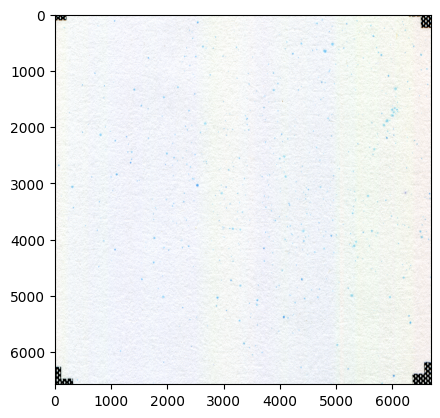

In [2]:
# Raw image filename and extension
file = "TelaAzul_Conf1_Exp1_3200dpi"
ext = ".bmp"

# Load raw image from the 'input/' folder
raw = Image.open(os.path.join('input', file+ext))

# Plot raw image
plt.imshow(raw)

### Crop the raw image

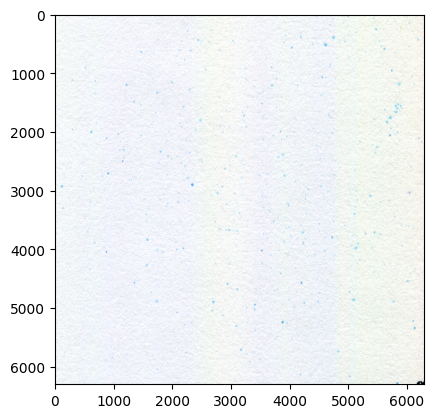

In [3]:
# In this example length==5.0, so the cropped image will be 5x5 cm^2. 
# Check that the cropped image does not contain undesired features. In our 
# experiments, no portion of the reference marks printed on the paper should 
# remain included inside the cropped image. 
# Remember that after cropping we keep the center of the original image, i.e. 
# borders are removed symmetrically until specified dimensions are satisfied.
# For further details see crop_raw definition in libs/utils.py.
rawcut = utils.crop_raw(raw, length, v_shift, h_shift, dpi)

# Plot the cropped image
plt.imshow(rawcut)

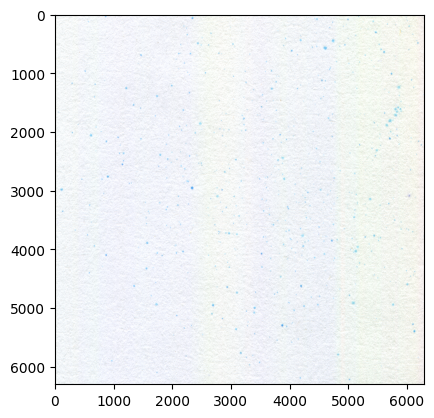

In [4]:
# Notice that a small portion of the reference mark remained on the bottom 
# right corner. In order to remove it, we must shift the cropped image by 
# adjusting the v_shift and h_shift parameters. 
# In this case the best result is obtained for v_shift = -55 and h_shift = 5, 
# i.e. shifting the cropped image 55 pixels upward and 5 pixels to the right.
v_shift = -55
h_shift = 5

# Crop 'raw' image with new parameters
rawcut = utils.crop_raw(raw, length, v_shift, h_shift, dpi)

# Plot the new cropped image
plt.imshow(rawcut)

### Select the RGB component with best stains-background contrast

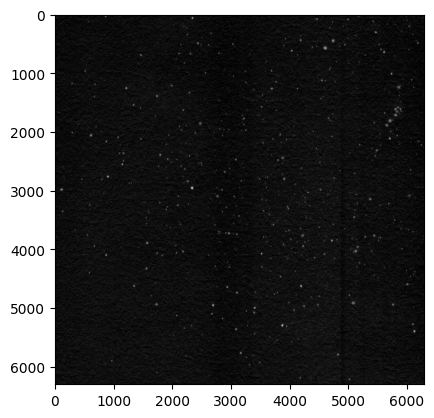

In [8]:
# In our experiments the stains are blue and background is white, so the red 
# component of the image negative gives the best contrast between stains and 
# background. Then, we find the cropped image negative and extract its first 
# (red) component in the RGB color space.
# In case of using another color for stains and/or background, select the
# component that maximizes the contrast between them.
rawneg = PIL.ImageOps.invert(rawcut)
rawnegred, _, _ = rawneg.split()

# Plot the red component of the image negative using a gray scale. 
plt.imshow(rawnegred, cmap='gray')

### Binarize the RGB component

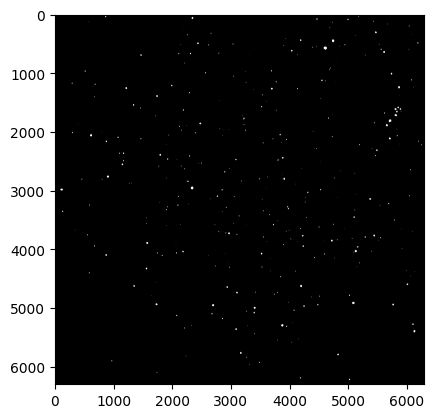

In [6]:
# Binarize 'rawnegred' image using the parameter 'binary_threshold'.
# All pixels values lower than 'binary_threshold' are set to 0 (so pixels are 
# turned to black pixels). Otherwise, they are set to 255 (so pixels turn to 
# white).

# With the Image.point() method from the Pillow library we are able to map
# each pixel through a function.
# 'rawnegred' is a grayscale image. The Pillow library assigns pixels in a 
# grayscale image a value from 0 to 255. So we must rescale 'binary_threshold' 
# to the 0-255 scale.
binary = rawnegred.point(lambda p: 255 if p >= (binary_threshold*255) else 0)

# We turn 'binary' into a binary image, that is, its pixels can only have two 
# values: '0' (Black) or '1' (White).
binary = binary.convert("1")

# 'binary' image is exported to the 'output/' folder, in PNG format (to save 
# storage) and with a dpi in each direction equal to the 'dpi' parameter 
# defined above.
binary.save(os.path.join('output', 'Binary_' + file + '.png'), 'PNG', dpi=(dpi, dpi))

# Plot the binarized image
plt.imshow(binary)

### Get the binary image mean pixel value

In [7]:
# Use the get_p function defined at libs/utils.py 
# to get the mean pixel value (p) of the 'binary' image.

utils.get_p(binary)

p: 0.0023106604185087628
